Импорт необходимых модулей

In [ ]:
import pandas as pd
import seaborn as sns
from scipy import stats

Загружаем csv файл. Переименовываем колонки для более простого доступа к ним.

In [ ]:
raw_data = pd.read_csv('/content/drive/MyDrive/Severstal_test/Статистика за 2018 год.csv', encoding='cp1251',)
raw_data = raw_data.rename(columns={'Число бракованных листов':'failures',
                         'Скорость прокатки': 'speed',
                         'Марка стали': 'steel'})

# 1. Проверяем гипотезу о влиянии скорости прокатки на количество бракованных листов в партии

Считаем количество партий, в которых скорость прокатки больше (DF_fast) и меньше (DF_slow) чем 4 м/с

In [ ]:
DF_fast = raw_data.query('speed > 4').reset_index(drop=True).drop(['steel','speed'], axis=1)
DF_slow = raw_data.query('speed <= 4').reset_index(drop=True).drop(['steel','speed'], axis=1)
print(DF_fast.count())
print(DF_slow.count())

failures    179
dtype: int64
failures    58
dtype: int64


Аналогично считаем количество партий, в которых скорость прокатки больше заданной и количество бракованных листов больше 3

In [ ]:
DF_fast_fail = raw_data.query('speed > 4 & failures > 3').reset_index(drop=True).drop(['steel','speed'], axis=1)
DF_slow_fail = raw_data.query('speed <= 4 & failures > 3').reset_index(drop=True).drop(['steel','speed'], axis=1)
print(DF_fast_fail.count())
print(DF_slow_fail.count())

failures    74
dtype: int64
failures    23
dtype: int64


Рассчитываем количество партий с повышенным браком для двух выборок:

In [ ]:
print(DF_fast_fail.count() / DF_fast.count())
print(DF_slow_fail.count() / DF_slow.count())

failures    0.413408
dtype: float64
failures    0.396552
dtype: float64


Мы видим, что процент партий с повышенным браком (более 3 листов на партию) при увеличенной скорости прокатки 41.3%, а при обычной скорости прокатки 39.7%.
На мой взгляд, мы не можем говорить о значительно повышенном проценте брака при скорости прокатки более 4 м/с на основании данной статистики. 
Далее проверим среднее число брака в тех партиях, где более 3 бракованных листов.

 

In [ ]:
print(DF_fast_fail.mean())
print(DF_slow_fail.mean())

failures    5.054054
dtype: float64
failures    4.869565
dtype: float64


Для партий с повышенной скоростью прокатки мы видим среднее значение 5.05 бракованных листов на партию, а для скоростей менее 4 м/с это 4.87. То есть среднее число бракованных листов в партиях со скоростью прокатки более 4 м/с немного выше (при сравнении партий с числом брака более 3 листов). 

Также я хотел бы представить альтернативный вариант оценки фактора скорости на количество бракованных листов в партии. Для этого примем нулевую гипотезу о том, что скорость прокатки НЕ влияет на количество брака. Теперь оценим вероятность того, что две наши выборки (скорость прокатки > 4 м/с и скорость прокатки менее 4 м/с) действительно принадлежат одной генеральной совокупности при помощи t-критерия Стьюдента.
Для начала построим распределение наших выборок, чтобы убедиться в том, что они похожи на нормальное распределение. 

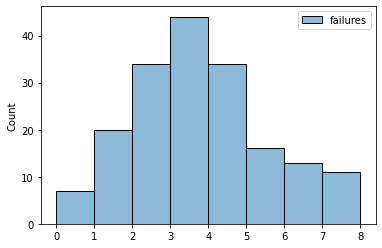

In [ ]:
sns.histplot(DF_fast, binwidth=1)

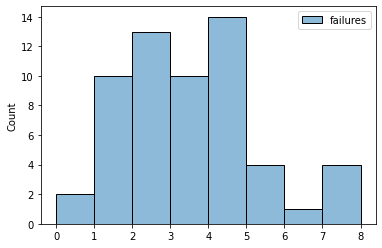

In [ ]:
sns.histplot(DF_slow, binwidth=1)

Распределения не идеальны, но к ним вполне допустимо применять наши методы оценки. Рассчитаем t-критерий для наших выборок:

In [ ]:
stats.ttest_ind(DF_fast, DF_slow, equal_var=False)

Ttest_indResult(statistic=array([0.90434438]), pvalue=array([0.36809629]))

Мы видим p-value 36.8%, что не позволяет нам отбросить нашу нулевую гипотезу. Мы еще раз убедились, что по данной статистике мы не можем заявлять о том, что скорость прокатки значимым образом влияет на количество бракованных листов в партии. 

# 2. Проверяем гипотезу о влиянии марки стали на количество бракованных листов в партии

Аналогично первой части, делаем 4 выборки: полные выборки сталей А и В и их выборки с увеличенным числом брака в партии:

In [ ]:
DF_markA = raw_data.query('steel == "A"').reset_index(drop=True).drop(['steel','speed'], axis=1)
DF_markB = raw_data.query('steel == "B"').reset_index(drop=True).drop(['steel','speed'], axis=1)
print(DF_markA.count())
print(DF_markB.count())
DF_markA_fail = raw_data.query('steel == "A" & failures > 3').reset_index(drop=True).drop(['steel','speed'], axis=1)
DF_markB_fail = raw_data.query('steel == "B" & failures > 3').reset_index(drop=True).drop(['steel','speed'], axis=1)
print(DF_markA_fail.count())
print(DF_markB_fail.count())

failures    139
dtype: int64
failures    98
dtype: int64
failures    53
dtype: int64
failures    44
dtype: int64


Рассчитываем долю партий с повышенным браком для двух марок стали:

In [ ]:
print(DF_markA_fail.count() / DF_markA.count())
print(DF_markB_fail.count() / DF_markB.count())

failures    0.381295
dtype: float64
failures    0.44898
dtype: float64


Мы видим долю партий с количеством бракованных листов больше 3 для марок стали А и В соответсвенно 38.1% и 44.9%. Т.е. процент партий с повышенным браком даже выше для марки В. Теперь подсчитаем среднее количество бракованных листов в тех партиях, где более 3 бракованных листов. 

In [ ]:
print(DF_markA_fail.mean())
print(DF_markB_fail.mean())

failures    5.113208
dtype: float64
failures    4.886364
dtype: float64


Для стали марки А мы видим среднее значение 5.11 листов, а для стали В 4.89 листа на партию. То есть среднее число бракованных листов все же выше для стали А, хотя частота возникновения такого явления ниже. 

Аналогично первой части, проведем альтернативное исследование. Снова примем нулевую гипотезу о том, что марка стали не влияет на число бракованных листов, т.е. наши выборки принадлежат одной генеральной совокупности. Оценим форму распределения наших выборок:

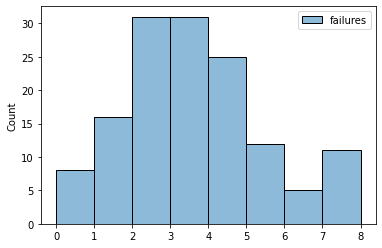

In [ ]:
sns.histplot(DF_markA, binwidth=1)

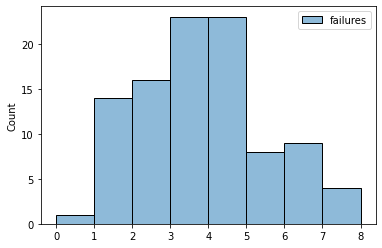

In [ ]:
sns.histplot(DF_markB, binwidth=1)

Формы распределения допускают применения к ним t-критерия Стьюдента. Рассчитаем его:

In [ ]:
stats.ttest_ind(DF_markA, DF_markB, equal_var=False)

Ttest_indResult(statistic=array([-0.8009856]), pvalue=array([0.42399599]))

Мы видим p-value более 42%, т.е. с высокой долей вероятности эти выборки взяты из одной генеральной совокупности, и мы снова не можем опровергнуть нулевую гипотезу. Таким образом, предоставленная статистика не позволяет нам заявлять о значимом влиянии марки стали на количество бракованных листов в партии. 

# Заключение

Предосталенные для анализа данные не позволяют нам говорить о значимом влиянии скорости прокатки или марки стали на частоту возникновения повышенного брака (более 3 листов на партию).